In [31]:
%load_ext autoreload
%autoreload 2
from utils import *
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Decathlon

In [32]:
data = pd.read_csv('csv/decathlon_reviews.csv')

In [33]:
np.count_nonzero(data.label == 1) / len(data)

0.8713345969450329

In [34]:
np.count_nonzero(data.label == -1) / len(data)

0.1286654030549671

In [35]:
len(data)

53814

In [36]:
fr_stopwords = french_stopwords()

In [37]:
review_list=np.array(list(data.review))

In [38]:
[vectorizer, X] = build_vectorizer(review_list, stopwords=fr_stopwords, b_stemming=True,\
                                          b_rmaccent=True, b_rmnumbers=True, max_features=1000)

Removing numbers
Removing stopwords
Stemming
Removing accents
Keeping the top 1000 occurring tokens


In [9]:
features = vectorizer.get_feature_names()
print(len(features))

1000


In [10]:
vectorizer.get_feature_names()

['1er',
 '2em',
 'abim',
 'abord',
 'absolu',
 'absorb',
 'accessoir',
 'accompagn',
 'accroch',
 'achat',
 'achet',
 'activ',
 'adapt',
 'adhérent',
 'adopt',
 'ador',
 'adult',
 'aer',
 'affair',
 'afin',
 'agreabl',
 'agréabl',
 'aid',
 'ailleur',
 'aim',
 'ains',
 'air',
 'ais',
 'ajout',
 'ajust',
 'aller',
 'alor',
 'amateur',
 'ami',
 'amorc',
 'amort',
 'amortisseur',
 'ampoul',
 'amus',
 'amélior',
 'an',
 'ancien',
 'anneau',
 'anné',
 'anti',
 'appareil',
 'apport',
 'apprec',
 'appréci',
 'apre',
 'apres',
 'apré',
 'arc',
 'arrier',
 'arriv',
 'arrêt',
 'articl',
 'assez',
 'assur',
 'attach',
 'attend',
 'attent',
 'attract',
 'aucun',
 'auss',
 'aut',
 'autour',
 'autr',
 'avant',
 'avantag',
 'avis',
 'avoir',
 'aérat',
 'bain',
 'balad',
 'ball',
 'ballad',
 'ballon',
 'band',
 'barr',
 'bas',
 'basket',
 'bass',
 'bateau',
 'beau',
 'beaucoup',
 'beb',
 'bel',
 'besoin',
 'bidon',
 'bien',
 'blanc',
 'blanch',
 'bless',
 'bleu',
 'bloqu',
 'blouson',
 'bois',
 'boit',

In [15]:
target = np.array(data.label)

In [12]:
X.shape

(53814, 1000)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.3,random_state=0,stratify=target)

In [14]:
interval = [10**-4, 10**-3, 10**-2, 10**-1, 1, 10, 10**2, 10**3]

In [76]:
mean_scores = []
for C in interval:
    clf = LinearSVC(C=C)
    #### MODIFIER LA FONCTION DE SCORE
    scores = cross_val_score(clf, X_train, y_train, cv=3,scoring='f1')
    mean_scores.append(np.mean(scores)) 

/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/lauranguyen/anaconda3/lib/python3.5/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


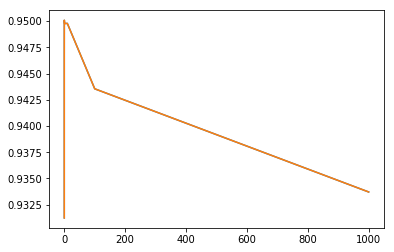

In [40]:
plt.plot(interval, mean_scores)
plt.show()

In [17]:
C_opt = 0.1 #interval[np.argmax(mean_scores)]
clf = LinearSVC(C=C_opt)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
f1_score(y_test,y_pred,pos_label=-1)

0.575591985428051

## Movies

In [5]:
data_movies = pd.read_csv('csv/movie_reviews.csv')
review_list=np.array(data_movies.review)


In [96]:
print(np.count_nonzero(data_movies.label == -1) / len(data_movies))
print(np.count_nonzero(data_movies.label == 1) / len(data_movies))

0.8365562575786585
0.1634437424213415


In [97]:
X_movies = vectorize_docs(vectorizer, review_list)
y_movies = np.array(data_movies.label)


In [99]:
#
y_pred=clf.predict(X_movies)
f1_score(y_movies,y_pred,pos_label=-1)

0.46110243507432463

## Tweets traduits

In [18]:
data_git = pd.read_csv('csv/tweets_git.csv')
tweet_list=np.array(data_git.review)[:10000]

In [19]:
print(np.count_nonzero(data_git.label == -1) / len(data_git))
print(np.count_nonzero(data_git.label == 1) / len(data_git))

0.5034518552265773
0.4965481447734227


In [30]:
data_git.head(10)

,label,review
0,1,statutnull
1,-1,- Awww c'est un bummer. Tu devrais avoir davi...
2,-1,Est contrarié qu'il ne puisse pas mettre à jou...
3,-1,J'ai plongé plusieurs fois pour la balle. A ré...
4,-1,Tout mon corps a des démangeaisons et comme si...
5,-1,Non il ne se comporte pas du tout. je suis en...
6,-1,Pas l'équipage complet
7,-1,besoin d'un câlin
8,-1,Bonjour pas de vue! Oui ... pleut un peu just...
9,-1,Non ils ne l'avaient pas


In [4]:
len(tweet_list)

1545256

In [24]:
np.unique(y_tweets)

array([-1,  1])

In [29]:
X_tweets.toarray()[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [26]:
tweet_list

array(['statutnull',
       "- Awww  c'est un bummer. Tu devrais avoir david carr du troisième jour pour le faire. ;ré",
       "Est contrarié qu'il ne puisse pas mettre à jour son facebook en le télémaignant ... et peut-être pleurer en conséquence  l'école aujourd'hui aussi. blabla!",
       ...,
       'Argh hate de savoir comment les forums ne vous permettent pas de supprimer les messages',
       'Je suis fatigué impatient et sur les garçons et leurs jeux stupides',
       "Je suis à 8 heures du matin quand j'aurais pu dormir"],
      dtype=object)

In [22]:
X_tweets = vectorize_docs(vectorizer, tweet_list)
y_tweets = np.array(data_git.label[:10000])
clf.score(X_tweets,y_tweets)

0.0327